# Assignment 2 by: Campbell Timms (s3720784)


This assignment focuses on data modelling, a core step in the data science process. You need to apply appropriate machine learning techniques (by using Python) to solve a series of data modelling problems and communicate your solutions and the results in a report.

In this assignment, you will use the dataset <span style="color: red;">A2data.csv</span>, which is available in Canvas under the Assignments >> Assignment 2 section of the course Canvas shell. The dataset is related to attributes and quality of wine.
Semester 2, 2024

The inputs include physicochemical tests (e.g. PH values) and the output is wine quality, which scales between 0 (very bad) and 10 (very excellent). There are 12 variables (i.e., attributes or columns) and 4781 instances (i.e., entries or rows). For description of attributes, check the file <span style="color: red;">Readme-A2data.txt</span>.

# Task 1: Regression


Load the CSV data from the provided file (using appropriate Python/Pandas functions). Take a random sample (i.e., subset) of 200 instances from the data set, and ensure that these instances don't have any missing values. Write the random sample into a CSV file and name the file as YourStudentNumber-A2SampleOne.csv. Select data for two variables: <b>alcohol</b> and <b>density<b/>.

In [1]:
# Start from here to write your code for Task 1. 

# Import data set. 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

red_wine = pd.read_csv('A2data.csv', sep = ';')

red_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar           object
chlorides               float64
free sulfur dioxide      object
total sulfur dioxide     object
density                  object
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [2]:
# Create random subset of 200 instances 

# Create subset without any missing values.
red_wine = red_wine.apply(pd.to_numeric, errors='coerce')
red_wine_clean = red_wine.dropna()

# Set seed for reproducibility 
np.random.seed(35)
red_wine_subset_1 = red_wine_clean.sample(200)

# Write subset to CSV file
red_wine_subset_1.to_csv("s3720784_A2SampleOne.csv")

In [3]:
red_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Display/show the relationship between these two variables in an appropriate graph (i.e., chart). In the report, describe any interesting relationships (or lack of relationships) that you observe from the visualisation.

<function matplotlib.pyplot.show(close=None, block=None)>

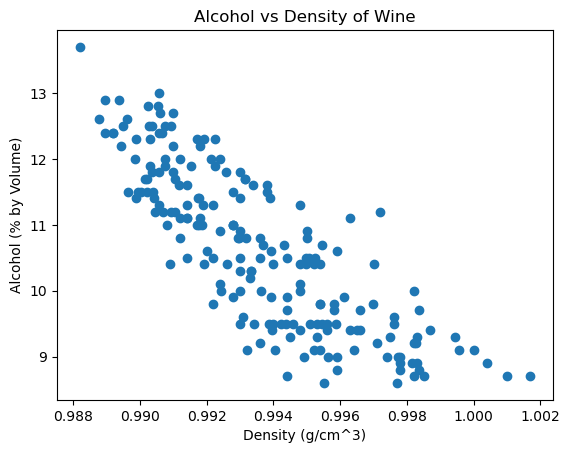

In [4]:
# Define variables 
alcohol = red_wine_subset_1["alcohol"].values
density = red_wine_subset_1["density"].values

# Convert the density to numeric as it's currently the object data type as it previously had missing values 
density = pd.to_numeric(red_wine_subset_1['density'], errors='coerce')

# Create scatter plot
plt.scatter(density, alcohol)
plt.title("Alcohol vs Density of Wine")
plt.ylabel("Alcohol (% by Volume)")
plt.xlabel("Density (g/cm^3)")
plt.show

<b>Simple linear model</b>

Build a linear model (i.e., Simple Linear Regression) for the two variables, with alcohol being dependent variable and density as independent variable. Evaluate the model appropriately. Display the data points along with the linear model in an appropriate graph. In the report, present the linear model and interpret the coefficients of the model.

Intercept: 364.85681646540195
Coefficient for density: -356.51607220323996
Mean Squared Error: 0.4646150374815812
R^2 Score: 0.6830753401703118


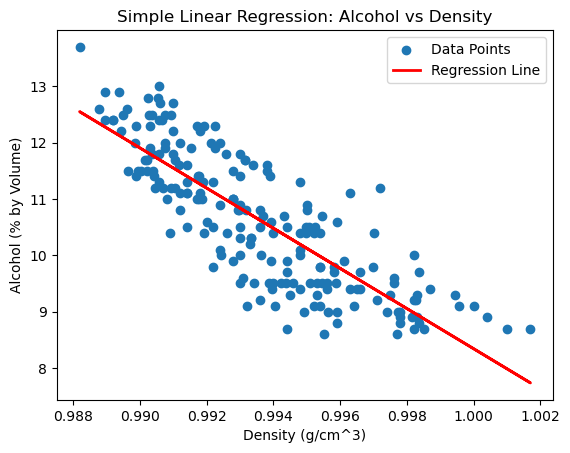

In [5]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

# Define the independent and dependent variables
X = density.values.reshape(-1, 1)  # Convert to 2D array for the linear regression function
y = alcohol # Dependent variable

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Model evaluation
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print model coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient for density: {model.coef_[0]}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting the data points and the linear regression line
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: Alcohol vs Density')
plt.xlabel("Density (g/cm^3)")
plt.ylabel("Alcohol (% by Volume)")
plt.legend()
plt.show()

# Task 2: Classification

Load the CSV data from the provided file (using appropriate Python/Pandas functions). Take a random sample (i.e., subset) of 500 instances from the data set, and ensure that these instances don't have any missing values. Write the random sample into a CSV file and name the file as YourStudentNumber-A2SampleTwo.csv. In this task, you will classify the wine <b>quality</b> based on the other variables.

In [6]:
# Create random subset of 500 instances 

# Set seed for reproducibility 
np.random.seed(45)
red_wine_subset_2 = red_wine_clean.sample(500)

# Write subset to CSV file
red_wine_subset_2.to_csv("s3720784_A2SampleTwo.csv")

## kNN

Implement a kNN (k-Nearest Neighbours) classifier. Choose an appropriate value of k and justify your choice (in the report). Evaluate the classifier using appropriate metrics.

In [7]:
# Generating Train/Test Set

from sklearn.model_selection import train_test_split

wine_quality = red_wine_subset_2["quality"]
wine_remove_quality = red_wine_subset_2.drop(columns=["quality"])

wine_train, wine_test, quality_train, quality_test = train_test_split(wine_remove_quality,wine_quality,test_size=0.25,random_state=273)

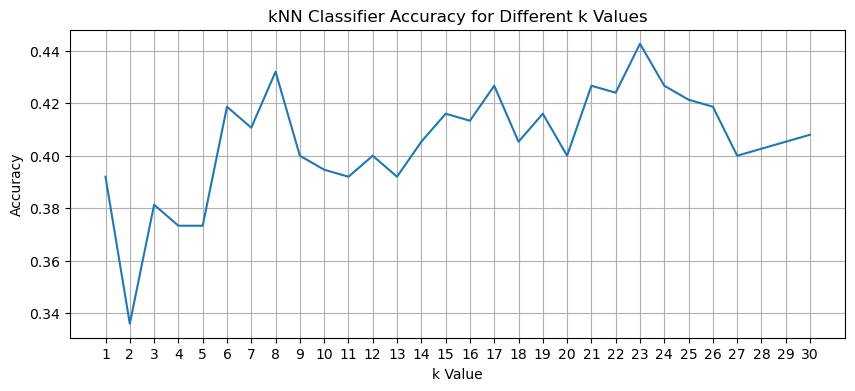

In [8]:
# Select appropriate value for k
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Use StratifiedKFold for stratified sampling of the target variable
skf = StratifiedKFold(n_splits=min(5, len(np.unique(y))))  # Ensure n_splits <= number of classes

# Test different values of k using Stratified K-Fold Cross-Validation
k_values = range(1, 31)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, wine_train, quality_train, cv=skf, scoring='accuracy')
    scores.append(score.mean())

# Plotting
plt.figure(figsize=(10, 4))
plt.plot(k_values, scores)
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('kNN Classifier Accuracy for Different k Values')
plt.xticks(k_values)
plt.grid()
plt.show()

In [9]:
# Building the model

clf = KNeighborsClassifier(n_neighbors=23)
fit = clf.fit(wine_train, quality_train)

quality_prediction_kNN = fit.predict(wine_test)
quality_prediction_kNN

array([6, 6, 6, 6, 5, 5, 5, 6, 6, 7, 7, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 7,
       6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 7, 6, 6, 5,
       6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6,
       6, 6, 5, 7, 6, 6, 6, 7, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6,
       5, 6, 6, 7, 6, 6, 6, 6, 6, 7, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 7, 7,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 7, 6, 6, 5, 6], dtype=int64)

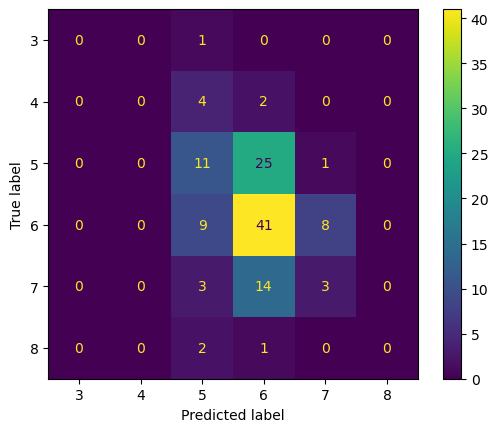

In [10]:
# Evaluating the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

unique_classes = np.unique(quality_test)
cm = confusion_matrix(quality_test, quality_prediction_kNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot()

In [11]:
from sklearn.metrics import classification_report

# Create classification report and output as dict
kNN_report = classification_report(quality_test, quality_prediction_kNN, zero_division=0, output_dict=True)
# Change to data frame to dispaly
kNN_report_df = pd.DataFrame(kNN_report).transpose()
print(kNN_report_df)

              precision    recall  f1-score  support
3              0.000000  0.000000  0.000000     1.00
4              0.000000  0.000000  0.000000     6.00
5              0.366667  0.297297  0.328358    37.00
6              0.493976  0.706897  0.581560    58.00
7              0.250000  0.150000  0.187500    20.00
8              0.000000  0.000000  0.000000     3.00
accuracy       0.440000  0.440000  0.440000     0.44
macro avg      0.185107  0.192366  0.182903   125.00
weighted avg   0.377738  0.440000  0.397038   125.00


## modified kNN 

Propose a method to modify kNN for better performance. Note that simply tuning parameters will not be considered a modified version of the algorithm. Implement and evaluate the modified kNN algorithm in comparison to the (above/original) kNN classifier. Display relevant results (of evaluation metrics) for comparison in an appropriate graph. In the report, describe the proposed method in detail; summarise the results and interpret the findings. Explain (and justify) why the proposed method can lead to better performance in this case.

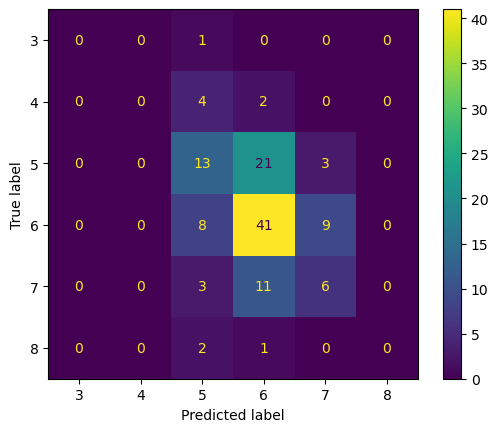

In [12]:
# Improve kNN results by adding a weighting factor to the distance calculation
# Building the model

clf = KNeighborsClassifier(n_neighbors=23, weights='distance')
fit = clf.fit(wine_train, quality_train)

quality_prediction_weight_kNN = fit.predict(wine_test)

# Evaluating the model
unique_classes = np.unique(quality_test)
cm = confusion_matrix(quality_test,quality_prediction_weight_kNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unique_classes)
disp.plot()

In [13]:
# Create classification report and output as dict
kNN_weight_report = classification_report(quality_test, quality_prediction_weight_kNN, zero_division=0, output_dict=True)
# Change to data frame to dispaly
kNN_weight_report_df = pd.DataFrame(kNN_weight_report).transpose()
print(kNN_weight_report_df)

              precision    recall  f1-score  support
3              0.000000  0.000000  0.000000     1.00
4              0.000000  0.000000  0.000000     6.00
5              0.419355  0.351351  0.382353    37.00
6              0.539474  0.706897  0.611940    58.00
7              0.333333  0.300000  0.315789    20.00
8              0.000000  0.000000  0.000000     3.00
accuracy       0.480000  0.480000  0.480000     0.48
macro avg      0.215360  0.226375  0.218347   125.00
weighted avg   0.427778  0.480000  0.447643   125.00


Since that was too easy. I thought I would also implement feature scaling.
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#

In [14]:
red_wine_subset_2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3736,6.9,0.40,0.17,12.9,0.033,59.0,186.0,0.99754,3.08,0.49,9.4,5
1222,7.3,0.24,0.39,3.6,0.024,35.0,116.0,0.99280,3.17,0.51,10.9,5
3059,6.2,0.36,0.38,3.2,0.031,20.0,89.0,0.98956,3.06,0.33,12.0,7
1766,8.2,0.36,0.29,7.6,0.035,37.0,122.0,0.99390,3.16,0.34,12.0,5
2160,6.6,0.32,0.27,10.9,0.041,37.0,146.0,0.99630,3.24,0.47,10.0,5


For the most part each variable is within one or two magnitudes of each other but the total sulfur dioxide is 10<sup>3</sup> while chlorides are 10<sup>-2</sup> resulting in a magnitutde difference of 10<sup>5</sup>. Variables with a larger magnitude tend to have a larger effect on the euclidean distance calculation 

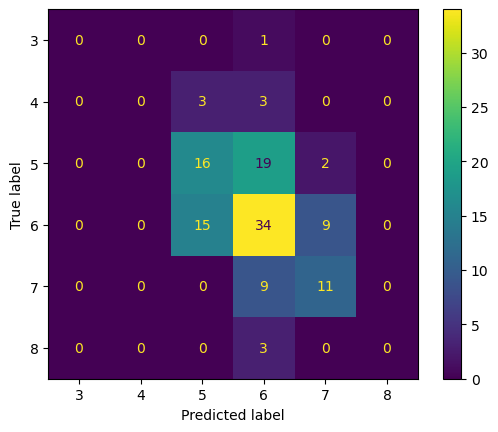

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(wine_train)
X_test_scaled = scaler.transform(wine_test)

clf_scaled = KNeighborsClassifier(n_neighbors=23, weights='distance')
clf_scaled.fit(X_train_scaled, quality_train)

quality_prediction_scale_kNN = clf_scaled.predict(X_test_scaled)

# Evaluating the model
unique_classes = np.unique(quality_test)
cm = confusion_matrix(quality_test,quality_prediction_scale_kNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unique_classes)
disp.plot()

In [16]:
# Create classification report and output as dict
kNN_scaling_report = classification_report(quality_test, quality_prediction_scale_kNN, zero_division=0, output_dict=True)
# Change to data frame to dispaly
kNN_scaling_report_df = pd.DataFrame(kNN_scaling_report).transpose()
print(kNN_scaling_report_df)

              precision    recall  f1-score  support
3              0.000000  0.000000  0.000000    1.000
4              0.000000  0.000000  0.000000    6.000
5              0.470588  0.432432  0.450704   37.000
6              0.492754  0.586207  0.535433   58.000
7              0.500000  0.550000  0.523810   20.000
8              0.000000  0.000000  0.000000    3.000
accuracy       0.488000  0.488000  0.488000    0.488
macro avg      0.243890  0.261440  0.251658  125.000
weighted avg   0.447932  0.488000  0.465659  125.000


## Decision Tree & comparison

Implement a Decision Tree classifier. Tune the model by adjusting key parameters. Choose the best value(s) for the parameter(s) and justify your choice. Evaluate the performance of the Decision Tree model using the same metrics as for kNN.

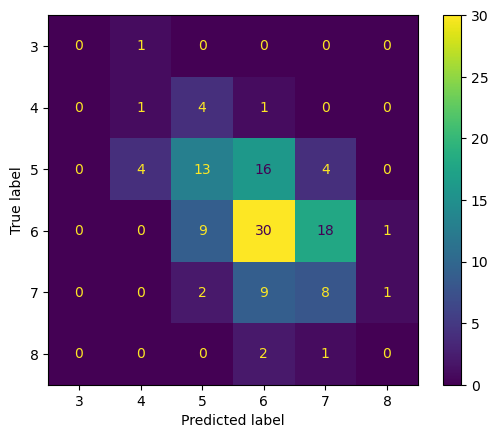

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Import and define classifier
clf = DecisionTreeClassifier()
fit = clf.fit(wine_train, quality_train)

# Use classifier model to make quality predictions 
quality_prediction_tree = fit.predict(wine_test)

# Evaluating the model
unique_classes = np.unique(quality_test)
cm = confusion_matrix(quality_test,quality_prediction_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unique_classes)
disp.plot()

To find the best parameters we can use hyperparameter tuning to find the best set of parameters from a handful of options.

In [18]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [10, 20, 30, 40],
    'min_samples_leaf': [5, 10, 15, 20],
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(wine_train, quality_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 10}


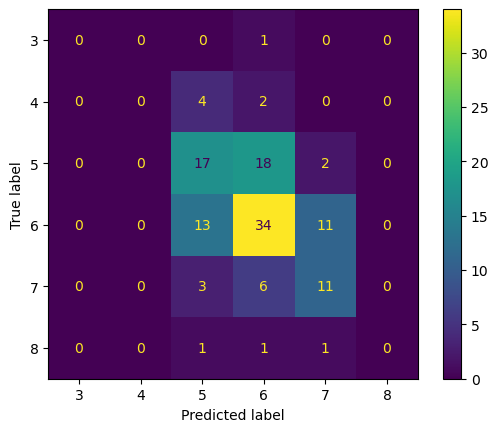

In [19]:
# Remake the classifier with the optimal parameters
clf = DecisionTreeClassifier(max_depth= 5,min_samples_split= 10, min_samples_leaf= 20)
fit = clf.fit(wine_train, quality_train) 
quality_prediction_tree = fit.predict(wine_test)

# Evaluating the model
unique_classes = np.unique(quality_test)
cm = confusion_matrix(quality_test,quality_prediction_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unique_classes)
disp.plot()

In [20]:
# Create classification report and output as dict
tree_report = classification_report(quality_test, quality_prediction_tree, zero_division=0, output_dict= True)
# Change to data frame to dispaly
tree_report_df = pd.DataFrame(tree_report).transpose()
print(tree_report_df)

              precision    recall  f1-score  support
3              0.000000  0.000000  0.000000    1.000
4              0.000000  0.000000  0.000000    6.000
5              0.447368  0.459459  0.453333   37.000
6              0.548387  0.586207  0.566667   58.000
7              0.440000  0.550000  0.488889   20.000
8              0.000000  0.000000  0.000000    3.000
accuracy       0.496000  0.496000  0.496000    0.496
macro avg      0.239293  0.265944  0.251481  125.000
weighted avg   0.457273  0.496000  0.475342  125.000


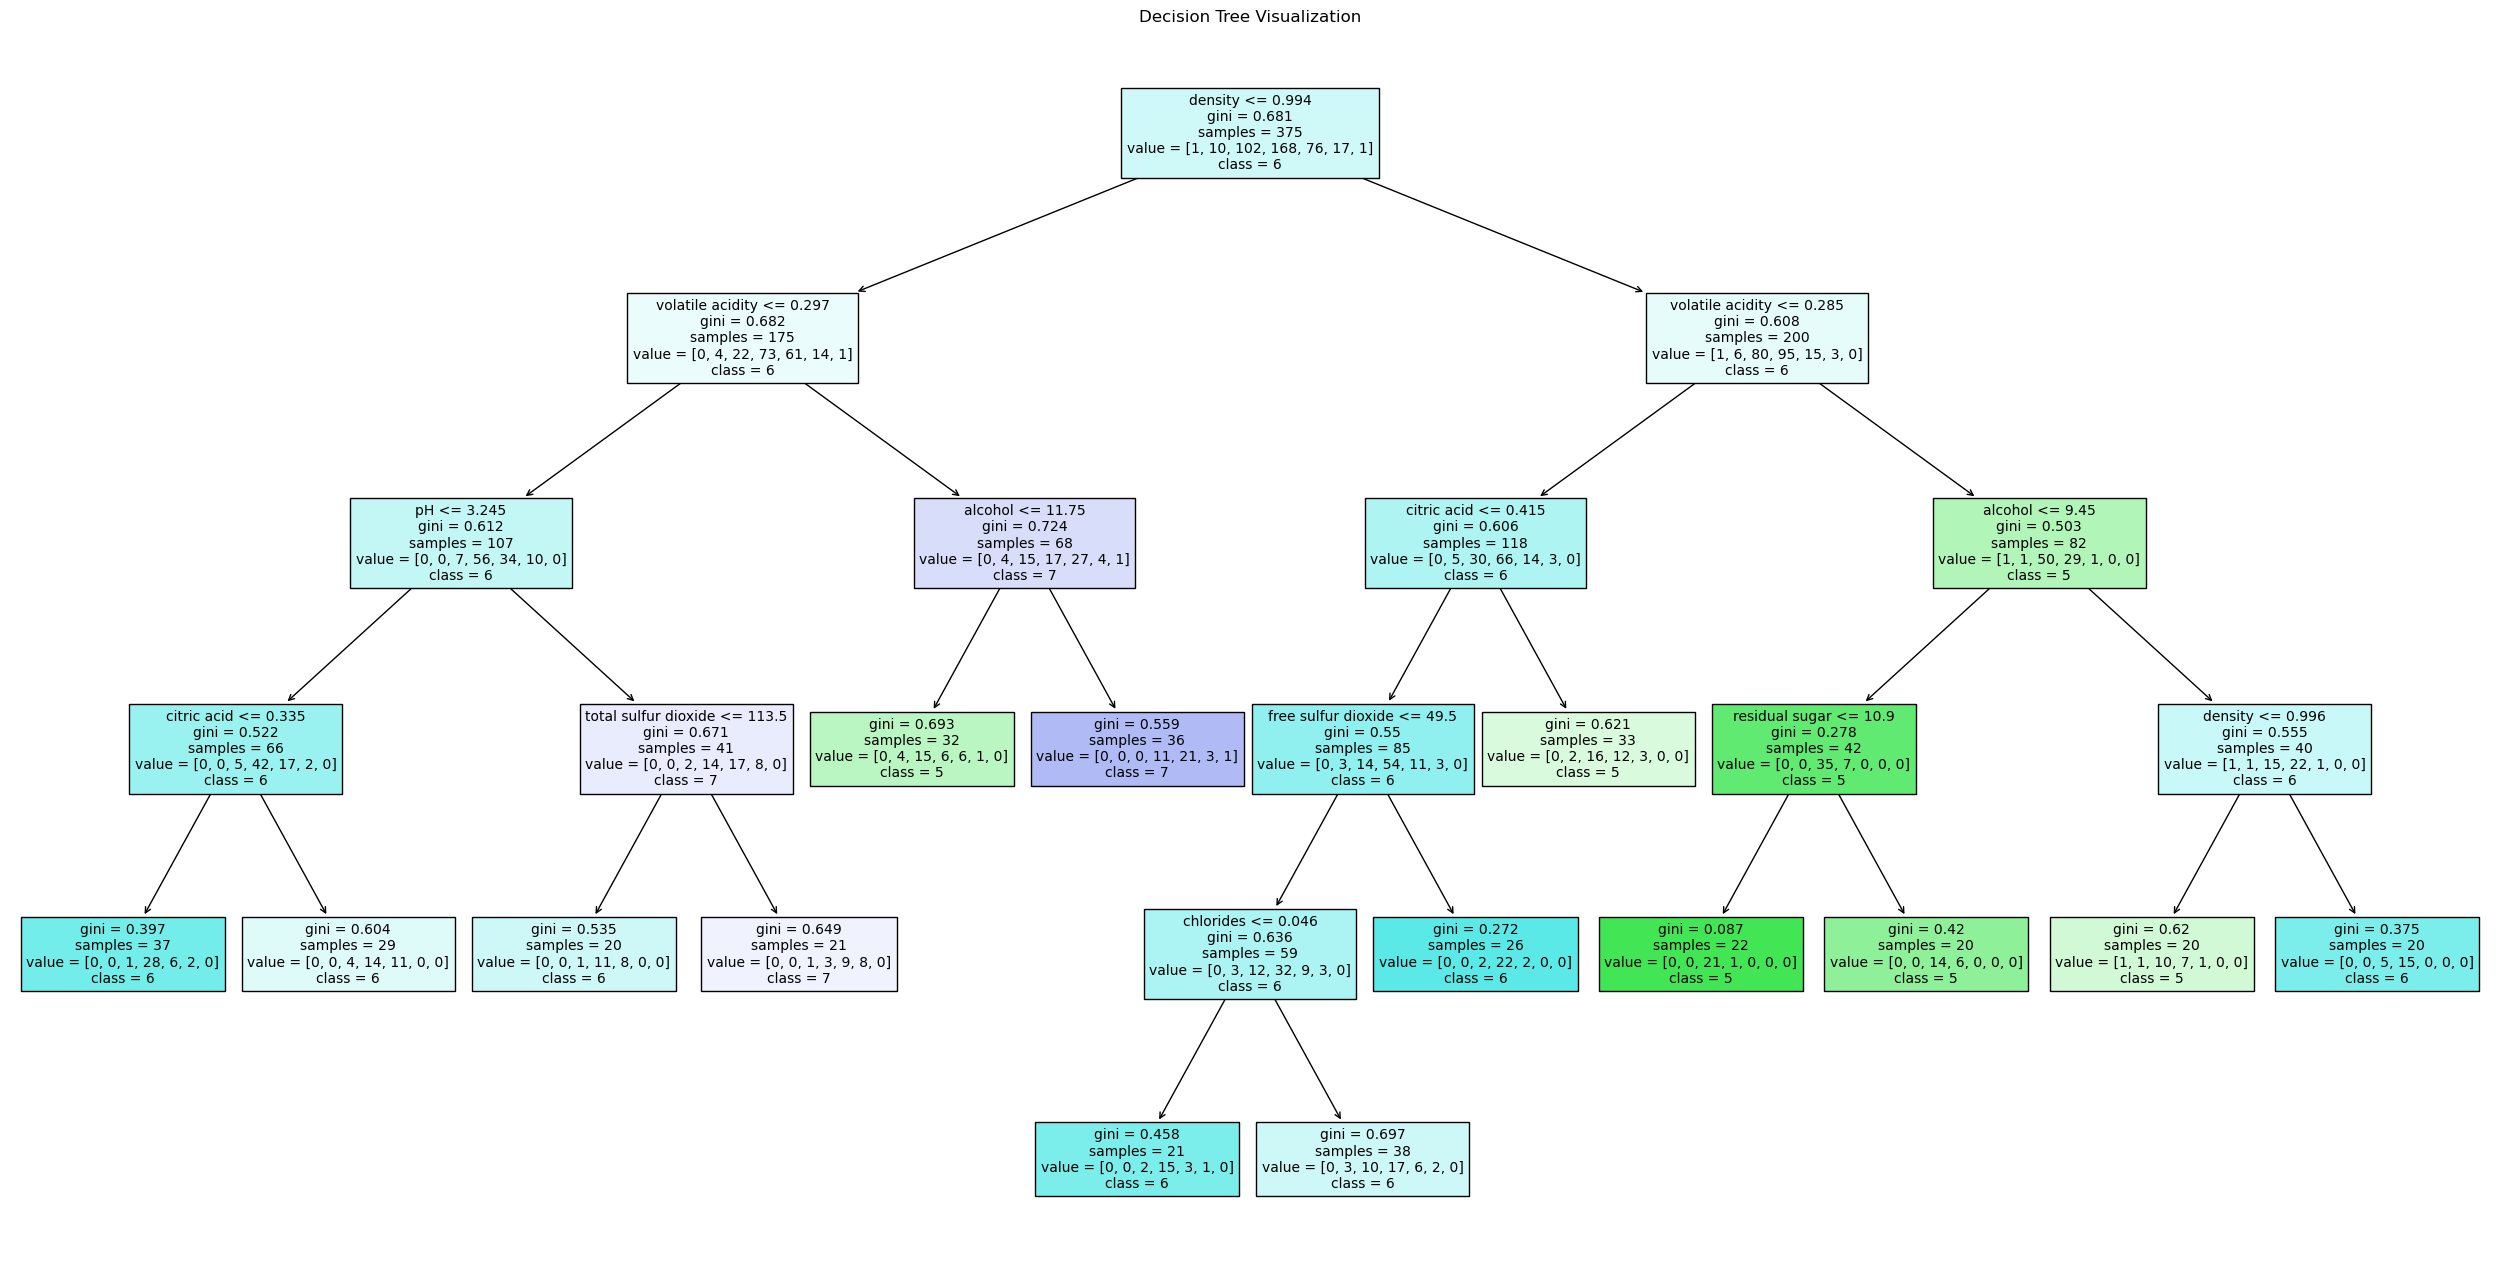

In [38]:
# Visualise the decision tree to get an understanding of the results
from sklearn.tree import plot_tree

# Convert class names to strings
class_names = [str(label) for label in clf.classes_]

# Plot the decision tree
plt.figure(figsize=(32, 16))
plot_tree(clf, filled=True, feature_names=wine_train.columns, class_names=class_names, fontsize= 10)
plt.title("Decision Tree Visualization")
plt.show()

Compare the results of the Decision Tree classifier with those of the kNN classifier (not the modified kNN). Display relevant results (of evaluation metrics) for comparison in an appropriate graph. In the report, summarise the results and interpret the findings. Discuss the strengths and weaknesses of each model in the context of the given dataset.

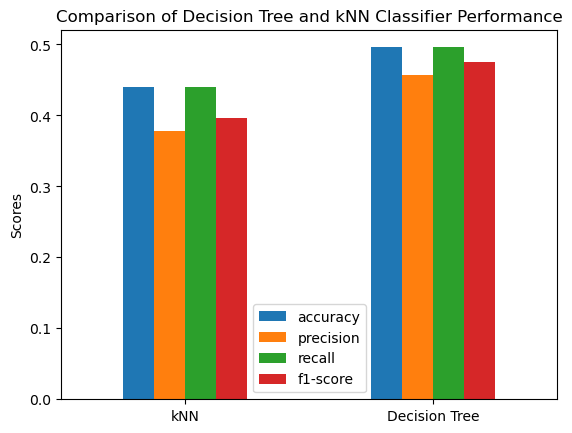

In [22]:
# Extract kNN evaluation metrics
kNN_metrics = {
    'accuracy': kNN_report['accuracy'],
    'precision': kNN_report['weighted avg']['precision'],
    'recall': kNN_report['weighted avg']['recall'],
    'f1-score': kNN_report['weighted avg']['f1-score']}

# Extract Decision Tree evaluation metrics
tree_metrics = {
    'accuracy': tree_report['accuracy'],
    'precision': tree_report['weighted avg']['precision'],
    'recall': tree_report['weighted avg']['recall'],
    'f1-score': tree_report['weighted avg']['f1-score']}

# Plot comparison
comparison_df = pd.DataFrame([kNN_metrics, tree_metrics], index=['kNN','Decision Tree'])
comparison_df.plot(kind='bar')
plt.title("Comparison of Decision Tree and kNN Classifier Performance")
plt.ylabel("Scores")
plt.xticks(rotation=0)  # Change rotation for labels
plt.legend()
plt.show()


In [23]:
# As a table
comparison_df

,accuracy,precision,recall,f1-score
kNN,0.440,0.377738,0.440,0.397038
Decision Tree,0.496,0.457273,0.496,0.475342


# Task 3: Clustering

Load the CSV data from the provided file (using appropriate Python/Pandas functions). Take a random sample (i.e., subset) of (300/600) instances from the data set, and ensure that these instances don't have any missing values. Write the random sample into a CSV file and name the file as YourStudentNumber-A2SampleThree.csv. In this task, you will conduct clustering upon all input variables (not using the output variable quality – it can be used for evaluation though).

In [24]:
# Set seed for reproducibility 
np.random.seed(16)
red_wine_subset_3 = red_wine_clean.sample(600)

# Write subset to CSV file
red_wine_subset_3.to_csv("s3720784_A2SampleThree.csv")

# Remove quality as the output variable 
wine_quality_cluster = red_wine_subset_3["quality"]
wine_variables_cluster = red_wine_subset_3.drop(columns=["quality"])

## k-Means 

Implement the k-Means algorithm. Evaluate its performance using multiple appropriate metrics. Explore the impact of the number of clusters (k) on the performance of the k-Means algorithm. In the report, summarise the results and interpret the findings, and justify your choice. Discuss any limitations of k-Means you might observe in this case, and possible solutions.

In [25]:
from sklearn import cluster

# Build and fit the k-Means model
kmeans_model = cluster.KMeans(n_clusters = 6, random_state=14, n_init ='auto')
fit = kmeans_model.fit(wine_variables_cluster)

I initially set k to 6 as that's the number of defined scores in the quality ratings

In [26]:
unique_classes

array([3, 4, 5, 6, 7, 8], dtype=int64)

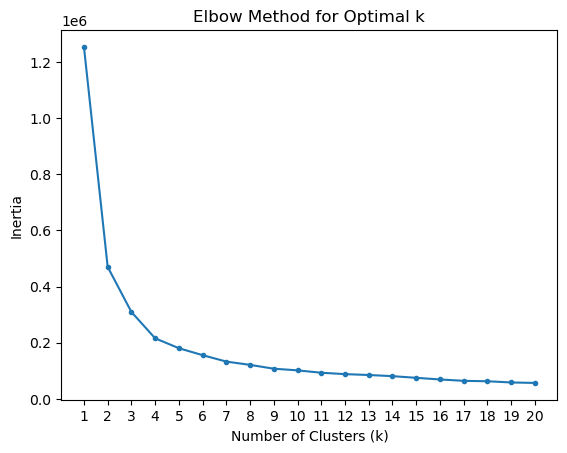

In [27]:
# To find the optimal value for k I am using the elbow method

# Define the range for k (from 1 to 20)
k_values = range(1, 21)

# List to hold the inertia values
inertia_values = []

# Calculate inertia for each k
for k in k_values:
    kmeans_model = cluster.KMeans(n_clusters=k, random_state=14, n_init ='auto')
    kmeans_model.fit(wine_variables_cluster)
    inertia_values.append(kmeans_model.inertia_)

# Plot the elbow curve
plt.figure()
plt.plot(k_values, inertia_values, marker='.')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()

Here we can see that 6 is a good choice but if I were just using the elbow method without any context of the desired result I would be inclined to pick 4.

In [28]:
# Reinitiate the k-Means model using k = 6
kmeans_model = cluster.KMeans(n_clusters = 6, random_state=14, n_init ='auto')
fit = kmeans_model.fit(wine_variables_cluster)

# Predict wine quality based on the clusters from the model
wine_variables_cluster["cluster"] = fit.predict(wine_variables_cluster)

# Add the true quality as a column for comparison and a column for the comparison count
wine_variables_cluster["target"] = wine_quality_cluster
wine_variables_cluster["c"] = "count"

# Group by predicted cluster and true quality label, then count occurrences
clustering_result = wine_variables_cluster[["cluster", "target", "c"]].groupby(["cluster", "target"]).agg("count")

# Print the results
print(clustering_result)

                 c
cluster target    
0       3        2
        4        3
        5       23
        6       79
        7       31
        8        6
1       4        3
        5       27
        6       30
        7        5
        8        1
2       3        1
        4        5
        5       39
        6       63
        7       22
        8        8
3       4        3
        5       58
        6       69
        7       28
        8        9
4       3        2
        4        4
        5       16
        6       15
        7        8
        8        3
5       5       22
        6       14
        8        1


In evaluating the the performance of this algorithm I'm using the metrics from the following source:
https://scikit-learn.org/dev/modules/clustering.html#clustering-performance-evaluation

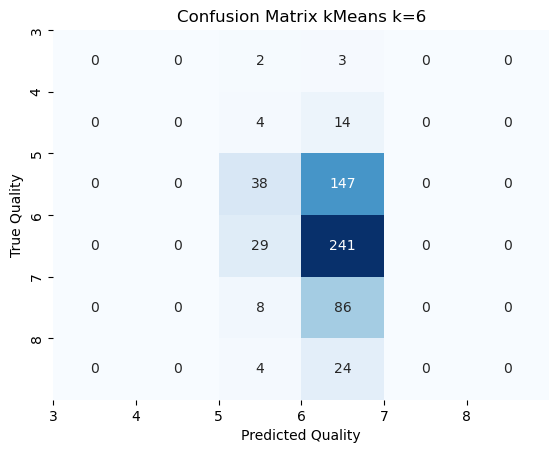

In [29]:
import seaborn as sns

#First I'll display the results in a confusion matrix to better understand the results.

# Map the most frequent target to the cluster numbers as this will be our prediction for the cluster
cluster_mapping = (wine_variables_cluster.groupby("cluster")["target"]
                   .agg(lambda x: x.value_counts().index[0]))
wine_variables_cluster["cluster"] = wine_variables_cluster["cluster"].map(cluster_mapping)

# Compute the confusion matrix
c = confusion_matrix(wine_variables_cluster['target'],wine_variables_cluster['cluster'])

# Create a heatmap visualization of the confusion matrix
plt.figure()
sns.heatmap(c, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix kMeans k=6')
plt.xlabel('Predicted Quality')
plt.xticks([0,1,2,3,4,5], labels = unique_classes)
plt.ylabel('True Quality')
plt.yticks([0,1,2,3,4,5], labels= unique_classes)
plt.show()

In [30]:
from sklearn.metrics import rand_score, homogeneity_score, completeness_score, v_measure_score

# Assign the true labels and the predicted labels to use in each test
true_labels = wine_variables_cluster['target']
predicted_clusters = wine_variables_cluster['cluster'] 

# Calculate metrics for k-Means
rand_index = rand_score(true_labels, predicted_clusters)
homogeneity = homogeneity_score(true_labels, predicted_clusters)
completeness = completeness_score(true_labels, predicted_clusters)
v_measure = v_measure_score(true_labels, predicted_clusters)

# Create a DataFrame to store the results
kmeans_metrics = pd.DataFrame({
    'Metric': ['Rand Index', 'Homogeneity', 'Completeness', 'V-Measure'],
    'Score': [rand_index, homogeneity, completeness, v_measure]
})

kmeans_metrics

,Metric,Score
0,Rand Index,0.418364
1,Homogeneity,0.008987
2,Completeness,0.028649
3,V-Measure,0.013682


## DBSCAN & comparison 

Implement the DBSCAN algorithm. Choose appropriate values for the epsilon parameter (Eps) and the minimum number of points (MinPts); justify your choice. Evaluate its performance using multiple appropriate metrics. Analyse and compare the performance of k-Means and DBSCAN; display the results for comparison in an appropriate graph. In the report, summarise the results and interpret the findings, and explain why.

In [31]:
# Initialize the variables to remove kmeans variables
wine_quality_cluster = red_wine_subset_3["quality"]
wine_variables_cluster = red_wine_subset_3.drop(columns=["quality"])

<function matplotlib.pyplot.show(close=None, block=None)>

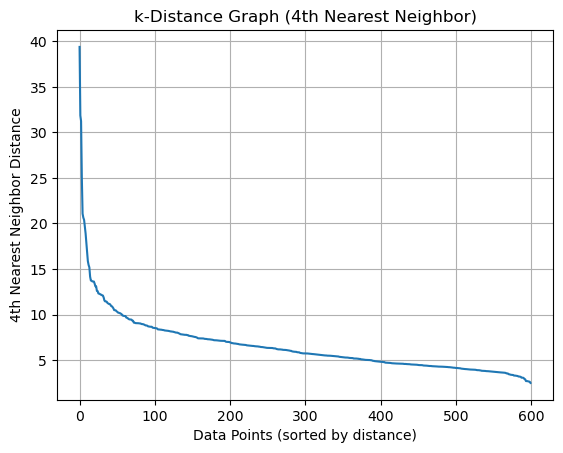

In [32]:
from sklearn.neighbors import NearestNeighbors

# To figure out what epsilon parameter and minimum points to use we can use a k-distance graph
nbrs = NearestNeighbors().fit(wine_variables_cluster)
distances, indices = nbrs.kneighbors(wine_variables_cluster)
kDis = distances[:,4]
kDis = np.sort(kDis)[::-1]

plt.plot(range(0,len(kDis)),kDis)
plt.title('k-Distance Graph (4th Nearest Neighbor)')
plt.xlabel('Data Points (sorted by distance)')
plt.ylabel('4th Nearest Neighbor Distance')
plt.grid()
plt.show

In [33]:
# Create the DBSCAN model with eps being 8 as that's where the elbow in the k-distance graph is.
dbscan_model = cluster.DBSCAN(eps=8, min_samples=5)
wine_variables_cluster["dbscan_cluster"] = dbscan_model.fit_predict(wine_variables_cluster)

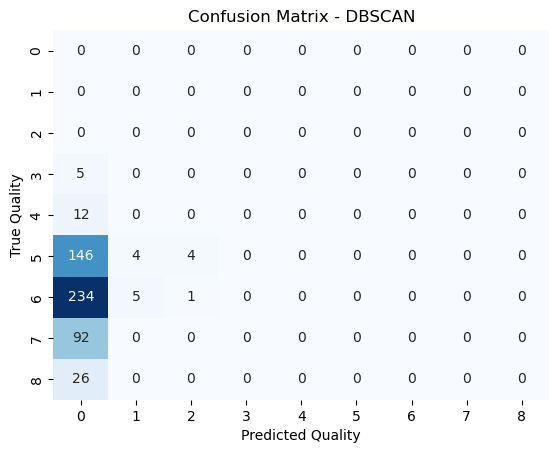

In [34]:
#Remove noise points (-1) for confusion matrix calculation
wine_variables_cluster = wine_variables_cluster[wine_variables_cluster["dbscan_cluster"] != -1]
# Add the true quality as a column for comparison
wine_variables_cluster["target"] = wine_quality_cluster

# Compute the confusion matrix
confusion = confusion_matrix(wine_variables_cluster['target'], wine_variables_cluster['dbscan_cluster'])

# Create a heatmap visualization
plt.figure()
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - DBSCAN')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.show()

In [35]:
# Assign the true labels and predicted clusters (excluding noise)
true_labels_dbscan = wine_variables_cluster['target']
predicted_clusters_dbscan = wine_variables_cluster['dbscan_cluster']

# Calculate metrics for DBSCAN
rand_index_dbscan = rand_score(true_labels_dbscan, predicted_clusters_dbscan)
homogeneity_dbscan = homogeneity_score(true_labels_dbscan, predicted_clusters_dbscan)
completeness_dbscan = completeness_score(true_labels_dbscan, predicted_clusters_dbscan)
v_measure_dbscan = v_measure_score(true_labels_dbscan, predicted_clusters_dbscan)

# Store the DBSCAN metrics in a DataFrame
dbscan_metrics = pd.DataFrame({
    'Metric': ['Rand Index', 'Homogeneity', 'Completeness', 'V-Measure'],
    'Score': [rand_index_dbscan, homogeneity_dbscan, completeness_dbscan, v_measure_dbscan]
})

dbscan_metrics


,Metric,Score
0,Rand Index,0.337379
1,Homogeneity,0.008768
2,Completeness,0.081723
3,V-Measure,0.015837


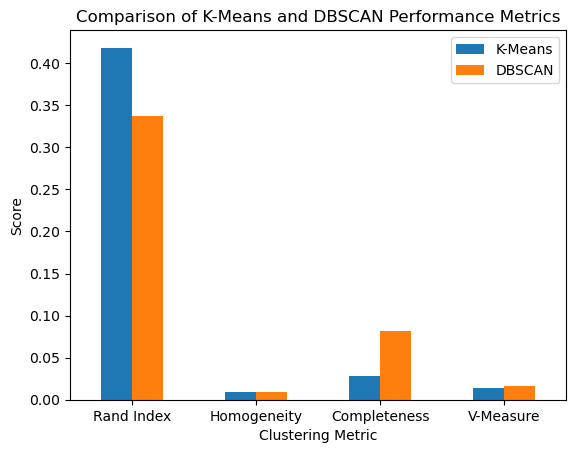

In [36]:
# Combine the metrics into a DataFrame for comparison
comparison_metrics = pd.DataFrame({
    'Metric': ['Rand Index', 'Homogeneity', 'Completeness', 'V-Measure'],
    'K-Means': [rand_index, homogeneity, completeness, v_measure],
    'DBSCAN': [rand_index_dbscan, homogeneity_dbscan, completeness_dbscan, v_measure_dbscan]
})

# Plot a grouped bar chart to compare K-Means and DBSCAN
comparison_metrics.set_index('Metric').plot(kind='bar')

# Set the title and labels
plt.title('Comparison of K-Means and DBSCAN Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Clustering Metric')

# Display the legend and plot
plt.legend(['K-Means', 'DBSCAN'])
plt.xticks(rotation=0)
plt.show()